In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob

In [2]:
paths = glob.glob(rf'C:\Users\mqalborn\Desktop\ET_3SEB\results\LAI/*.csv')
paths_prosail = [item for item in paths if 'PROSAIL' in item]
paths_modis = [item for item in paths if 'MODIS' in item]

def read_csv(path):
    df = pd.read_csv(path)
    sat = os.path.basename(path).split('_')[1]
    df.loc[:, 'satellite'] = sat
    return df

pd_prosail = [read_csv(XX) for XX in paths_prosail]
pd_prosail = pd.concat(pd_prosail).drop('Unnamed: 0', axis=1)

con = pd_prosail.satellite == 'L08'
pd_prosail.loc[con, 'date'] = pd.to_datetime(pd_prosail[con].id.str.split('_', expand=True)[4]).dt.date
con = pd_prosail.satellite == 'S2'
pd_prosail.loc[con, 'date'] = pd.to_datetime(pd_prosail[con].id.str.split('_', expand=True)[1].str.split('T', expand=True)[0]).dt.date

# pd_prosail.loc[:, 'date'] = pd.to_datetime(pd_prosail.id.str.split('_', expand=True)[4]).dt.date
pd_prosail = pd_prosail.reset_index()
print(pd.unique(pd_prosail.block))
con = pd_prosail.block.isin(['NCC', 'CC'])
pd_prosail.loc[con, 'farm'] = 'BLS'
pd_prosail.loc[-con, 'farm'] = 'RIP720'
pd_prosail.loc[:, 'product'] = 'PROSAIL'
# print(pd_prosail.head())

['NCC' 'CC' 721 723 722 724]


In [5]:
pd_modis = [pd.read_csv(XX) for XX in paths_modis]
pd_modis = pd.concat(pd_modis).drop(['geometry', 'system:time_start'], axis=1)
pd_modis.loc[:, 'satellite'] = 'L0X'
pd_modis.rename(columns={'solar_time': 'date', 'LAI_mean': 'LAI', 'LAI_stdDev': 'LAI_std'}, inplace=True)
pd_modis.loc[:, 'date'] = pd.to_datetime(pd_modis.date).dt.date
pd_modis = pd_modis.reset_index()
# print(pd_modis.head())

con = pd_modis.block.isin(['NCC', 'CC'])
pd_modis.loc[con, 'farm'] = 'BLS'
pd_modis.loc[-con, 'farm'] = 'RIP720'
pd_modis.loc[:, 'product'] = 'L0X_MODIS'
# sns.lineplot(data=pd_modis, x='date', y='LAI', hue='farm')

In [9]:
pd_modis

,product,farm,block,satellite,date,LAI,LAI,LAI_std,LAI_std
0,L0X_MODIS,RIP720,721,L0X,NaT,0.122240,NaN,0.003076,NaN
1,L0X_MODIS,RIP720,721,L0X,NaT,0.000000,NaN,0.000000,NaN
2,L0X_MODIS,RIP720,721,L0X,NaT,0.206520,NaN,0.010214,NaN
3,L0X_MODIS,RIP720,721,L0X,NaT,0.202880,NaN,0.006647,NaN
4,L0X_MODIS,RIP720,721,L0X,NaT,0.171280,NaN,0.007275,NaN
...,...,...,...,...,...,...,...,...,...
963,L0X_MODIS,RIP720,724,L0X,NaT,0.119833,NaN,0.106554,NaN
964,L0X_MODIS,RIP720,724,L0X,NaT,0.000000,NaN,0.000000,NaN
965,L0X_MODIS,RIP720,724,L0X,NaT,0.000000,NaN,0.000000,NaN
966,L0X_MODIS,RIP720,724,L0X,NaT,0.137667,NaN,0.008380,NaN


In [13]:
pd_prosail = pd_prosail[['product', 'farm', 'block', 'satellite', 'date', 'LAI', 'LAI_std']]
pd_modis = pd_modis[['product', 'farm', 'block', 'satellite', 'date', 'LAI', 'LAI_std']]
dataset = pd.concat([pd_prosail, pd_modis]).reset_index()

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [8]:
# dataset_filtered = dataset[dataset.satellite == 'L08']

sns.relplot(data=pd_modis, x='date', y='LAI', col='farm', hue='block',
            row='satellite', row_order=['S2', 'L08', 'L0X'],
            style='satellite',
            kind='line', marker='o', facet_kws={'sharex': False})

ValueError: Data must be 1-dimensional, got ndarray of shape (968, 2) instead

In [12]:
dataset_L0X = dataset[dataset.satellite == 'L0X']
dataset_L0X.block = dataset_L0X.block.astype(str)
con = dataset_L0X.block.isin(['721', '722'])
dataset_L0X.loc[con, 'treatment'] = 'NCC'
con = dataset_L0X.block.isin(['723', '724'])
dataset_L0X.loc[con, 'treatment'] = 'CC'
# print(dataset_L0X[con])

con = dataset_L0X.block.isin(['NCC'])
dataset_L0X.loc[con, 'treatment'] = 'NCC'
con = dataset_L0X.block.isin(['CC'])
dataset_L0X.loc[con, 'treatment'] = 'CC'



NameError: name 'dataset' is not defined

In [47]:
dataset_L0X = pd.read_csv('C:/Users/mqalborn/Desktop/ET_3SEB/results/LAI/LAI_L0X_MODIS_BLS.csv')

dataset_L0X.solar_time = pd.to_datetime(dataset_L0X.solar_time)
dataset_L0X.loc[:, 'year'] = dataset_L0X.solar_time.dt.year
dataset_L0X.block = dataset_L0X.block.astype(str)

# con = dataset_L0X.block.isin(['721', '722'])
# dataset_L0X.loc[con, 'treatment'] = 'NCC'
# con = dataset_L0X.block.isin(['723', '724'])
# dataset_L0X.loc[con, 'treatment'] = 'CC'
# # print(dataset_L0X[con])
#
# con = dataset_L0X.block.isin(['NCC'])
# dataset_L0X.loc[con, 'treatment'] = 'NCC'
# con = dataset_L0X.block.isin(['CC'])
# dataset_L0X.loc[con, 'treatment'] = 'CC'
dataset_L0X = dataset_L0X[dataset_L0X.year == 2024]

In [43]:
dataset_L0X

,geometry,LAI_count,LAI_mean,LAI_stdDev,system:time_start,block,solar_time,year
0,NaN,137,0.881692,0.880765,1704825947572,NCC,2024-01-09 10:32:26.512607+00:00,2024
1,NaN,0,NaN,NaN,1706208341417,NCC,2024-01-25 10:27:01.381540+00:00,2024
2,NaN,144,0.283263,4.789955,1707590746923,NCC,2024-02-10 10:24:42.795343+00:00,2024
3,NaN,144,0.347001,3.277278,1708973141924,NCC,2024-02-26 10:25:27.717501+00:00,2024
4,NaN,4,0.515378,0.500000,1710355531178,NCC,2024-03-13 10:28:46.990152+00:00,2024
...,...,...,...,...,...,...,...,...
131,NaN,144,0.930269,6.616944,1752518727247,CC,2025-07-14 10:32:51.663617+00:00,2025
132,NaN,144,0.813738,4.494976,1753901133602,CC,2025-07-30 10:32:05.982012+00:00,2025
133,NaN,144,0.805511,3.947567,1755283545658,CC,2025-08-15 10:34:02.485760+00:00,2025
134,NaN,144,0.771552,3.516057,1756665949700,CC,2025-08-31 10:38:19.248695+00:00,2025


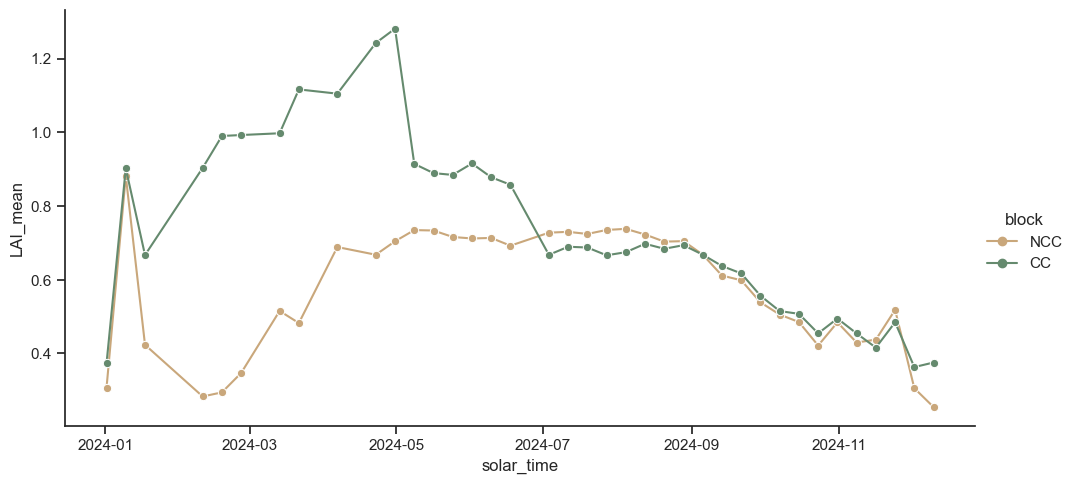

In [48]:
sns.set_style('ticks')
sns.set_context('notebook')
sns.set_palette(['#C9A77B', '#658A6E'])
sns.relplot(data=dataset_L0X, x='solar_time', y='LAI_mean',
            hue='block',
            # row='farm',
            # style='satellite',
            kind='line', marker='o', facet_kws={'sharex': False}, aspect=2)

plt.savefig(rf'C:\Users\mqalborn\Desktop\ET_3SEB\figures/LAI_L0X_TIMESERIES_2019_bls.png', dpi=300)
